In [45]:
# Ekranı genişletmek için: 
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

In [46]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [47]:
# Load Data
# Read Csv
DATAPATH = 'C:/Users/ahmet/Desktop/Training/Data_ML_Projects/GT_Use_Case/train.csv'

data = pd.read_csv(DATAPATH)
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0


In [48]:
## Understanding the Data and Cleaning

In [49]:
data.shape

(2372805, 12)

In [50]:
data.nunique(axis=0)

Id                2372805
step                  431
action                  5
amount            2205313
nameOrig            14141
oldBalanceOrig    2331142
newBalanceOrig    2334054
nameDest            54904
oldBalanceDest     813248
newBalanceDest     824041
isFraud                 2
isFlaggedFraud          1
dtype: int64

In [51]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Id,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,2372805.000000,2372805.000000,2372805.000000,2372805.000000,2372805.000000,2372805.000000,2372805.000000,2372805.000000,2372805.000000
mean,1676995.397150,183.291973,145451.915293,3332225.905840,3315864.112968,282359.093388,329937.822233,0.000075,0.000000
std,967937.563879,125.877387,312216.481885,1777182.891239,1744701.630497,955456.938497,1138434.868730,0.008661,0.000000
min,0.000000,0.000000,0.110000,-195969.580000,-195969.580000,-143907.830000,-62332.570000,0.000000,0.000000
25%,838354.000000,44.000000,14368.890000,2563357.130000,2559985.750000,21798.050000,23911.350000,0.000000,0.000000
50%,1677475.000000,187.000000,97853.080000,3425072.270000,3407158.830000,77146.570000,79652.160000,0.000000,0.000000
75%,2515399.000000,265.000000,171409.560000,4117519.220000,4089954.730000,141409.930000,144392.820000,0.000000,0.000000
max,3352886.000000,718.000000,20268571.110000,49556742.790000,48827982.720000,47837977.330000,47993052.840000,1.000000,0.000000


In [52]:
data_cleaned = data.dropna(axis=0)
data_cleaned.shape

(2372805, 12)

In [53]:
## There is no NA value
## So we can keep using original data

In [54]:
dataActionBar=pd.crosstab(data['action'], data['isFraud'])
dataActionBar
## Distribution of Fraud or Not for Actions

isFraud,0,1
action,,
CASH_IN,1032064,0
CASH_OUT,560058,94
DEBIT,88122,0
PAYMENT,553096,0
TRANSFER,139287,84


In [55]:
dataActionBar=dataActionBar.add_suffix('_Count').reset_index()
dataActionBar = dataActionBar.rename(columns={'0_Count': '0', '1_Count': '1',})
dataActionBar

isFraud,action,0,1
0,CASH_IN,1032064,0
1,CASH_OUT,560058,94
2,DEBIT,88122,0
3,PAYMENT,553096,0
4,TRANSFER,139287,84


In [56]:
## Distribution of FlaggedFraud or Not for Actions
dataActionBarFlagged=pd.crosstab(data['action'], data['isFlaggedFraud'])
dataActionBarFlagged=dataActionBarFlagged.add_suffix('_Count').reset_index()
dataActionBarFlagged = dataActionBarFlagged.rename(columns={'0_Count': '0', '1_Count': '1',}, index={'isFraud': 'index'})
dataActionBarFlagged

isFlaggedFraud,action,0
0,CASH_IN,1032064
1,CASH_OUT,560152
2,DEBIT,88122
3,PAYMENT,553096
4,TRANSFER,139371


In [57]:
data.shape

(2372805, 12)

In [58]:
## Data Preprocessing

In [59]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0


In [60]:
dataCorr=data[['amount','oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest', 'newBalanceDest']]

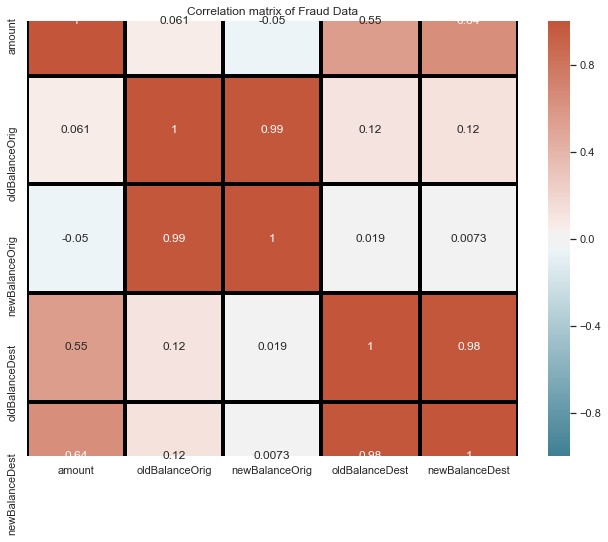

In [192]:
# calculate correlation matrix
corr = dataCorr.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True),vmin=-1, vmax=1, center= 0, 
          linewidths=3, linecolor='black' )
sns.set(rc={'figure.figsize':(11 , 8)})
plt.title("Correlation matrix of Fraud Data")
plt.show()

## Size Sıkıntı

In [62]:
## There is positive highly correlation between oldBalanceOrig and newBalanceOrig
## There is positive highly correlation between oldBalanceDest and newBalanceDest

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


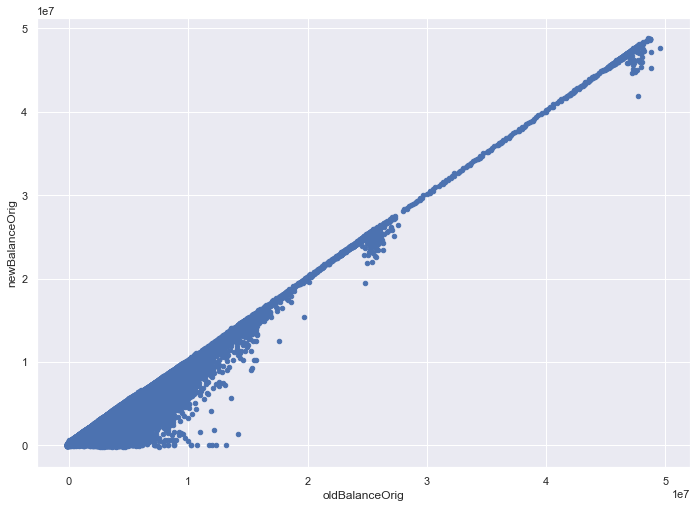

In [63]:
data.plot(kind='scatter', x='oldBalanceOrig', y='newBalanceOrig')


<Figure size 576x432 with 0 Axes>

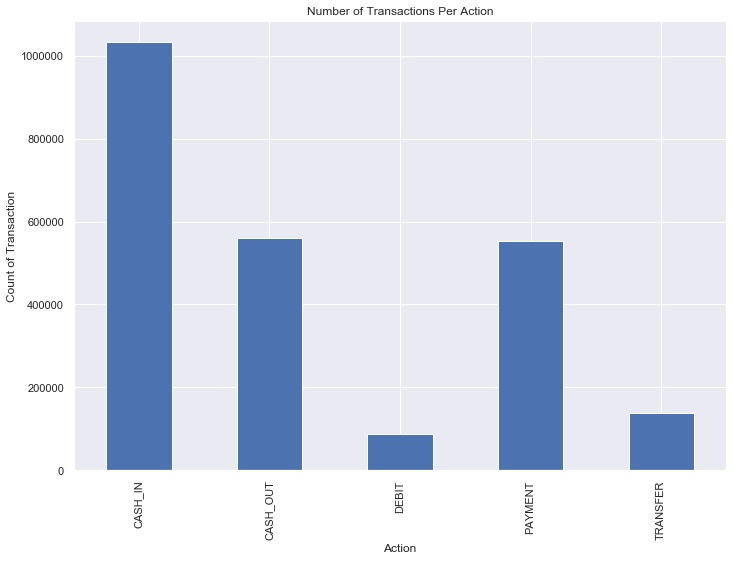

<Figure size 576x432 with 0 Axes>

In [66]:
dataActionBarGraph2 = data.groupby(['action']).size().plot(kind='bar')
dataActionBarGraph2.set_title("Number of Transactions Per Action")
dataActionBarGraph2.set_xlabel("Action")
dataActionBarGraph2.set_ylabel("Count of Transaction")
plt.figure(figsize=(8, 6))


Text(0, 0.5, 'Count of Transaction')

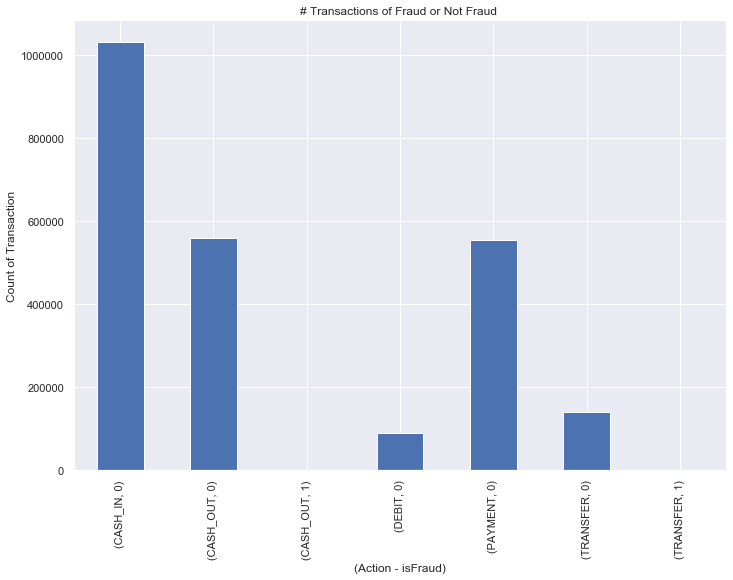

In [65]:
dataActionBarGraph = data.groupby(['action', 'isFraud']).size().plot(kind='bar')
dataActionBarGraph.set_title("# Transactions of Fraud or Not Fraud ")
dataActionBarGraph.set_xlabel("(Action - isFraud)")
dataActionBarGraph.set_ylabel("Count of Transaction")


In [67]:
## Creating 'Hour' Column

In [68]:
data['step'].value_counts().sort_index()

0         1
1      3229
2       646
3         8
4         1
       ... 
714     244
715     680
716      15
717     218
718     316
Name: step, Length: 431, dtype: int64

In [78]:
data['hour']= data['step'].apply(lambda x: x % 24)
data.tail()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour
2372800,3352878,718,TRANSFER,365959.08,C0575993734,9750032.16,9384073.08,C0205431023,7479928.58,7845887.66,0,0,22
2372801,3352879,718,CASH_OUT,51782.58,C8713379202,3457100.71,3405318.13,C2547402522,159726.22,159726.22,0,0,22
2372802,3352883,718,CASH_IN,74040.32,C4075734978,3009859.11,3083899.42,C2435516230,105711.72,105711.72,0,0,22
2372803,3352884,718,PAYMENT,11726.71,C8642260114,2980280.08,2968553.37,C5055233979,94282.56,106009.27,0,0,22
2372804,3352886,718,CASH_IN,115158.72,C0725945548,3599990.89,3715149.61,C1039537388,216298.60,216298.60,0,0,22


In [79]:
dataHourFraud = data[data['isFraud']==1]
dataHourFraud.tail()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour
2367281,3345186,692,CASH_OUT,3937916.16,C1860927231,3937916.16,0.00,C6569878894,246384.74,246384.74,1,0,20
2368506,3346896,694,CASH_OUT,4313189.48,C1795113484,4313189.48,0.00,C9041864042,178316.30,178316.30,1,0,22
2369459,3348202,705,CASH_OUT,5863566.31,C4034768832,5863566.31,0.00,C8690207514,261428.07,261428.07,1,0,9
2370571,3349756,709,TRANSFER,12286989.01,C4068193282,12286989.01,0.00,C2165589023,0.00,12286989.01,1,0,13
2371587,3351131,715,CASH_OUT,302522.22,C8834422258,371521.88,68999.66,C4763322164,210121.75,210121.75,1,0,19


In [80]:
dataHourFraud = dataHourFraud[['action','hour' ,'isFraud']]

In [81]:
dataHourCountFraud = dataHourFraud.groupby(['hour'])['isFraud'].aggregate(['count'])
dataHourCountFraud.head()

,count
hour,
0,4
1,7
2,3
3,20
4,3


In [82]:
dataHourNotFraud = data[data['isFraud']==0]
dataHourNotFraud = dataHourNotFraud[['action','hour' ,'isFraud']]
dataHourNotFraud.head()

,action,hour,isFraud
0,TRANSFER,0,0
1,CASH_IN,1,0
2,CASH_IN,1,0
3,CASH_IN,1,0
4,CASH_IN,1,0


In [83]:
dataHourCountNotFraud = dataHourNotFraud.groupby(['hour'])['isFraud'].aggregate(['count'])
dataHourCountNotFraud.head()

,count
hour,
0,77875
1,27616
2,6613
3,395
4,12


In [84]:
dataHourCountFraud=dataHourCountFraud.add_suffix('_Count').reset_index()
dataHourCountFraud = dataHourCountFraud.rename(columns={'count_Count': 'fraud_count'})
dataHourCountFraud=pd.DataFrame(dataHourCountFraud)
dataHourCountFraud.head()

,hour,fraud_count
0,0,4
1,1,7
2,2,3
3,3,20
4,4,3


In [85]:
dataHourCountNotFraud=dataHourCountNotFraud.add_suffix('_Count').reset_index()
dataHourCountNotFraud = dataHourCountNotFraud.rename(columns={'count_Count': 'not_fraud_count'})
dataHourCountNotFraud=pd.DataFrame(dataHourCountNotFraud)
dataHourCountNotFraud.head()

,hour,not_fraud_count
0,0,77875
1,1,27616
2,2,6613
3,3,395
4,4,12


In [86]:
dataHours = dataHourCountNotFraud.merge(dataHourCountFraud, on='hour', how='left')
dataHours.head()

## Joinleme yaparak saatlik fraud ve not fraud sayılarını bulduk

,hour,not_fraud_count,fraud_count
0,0,77875,4
1,1,27616,7
2,2,6613,3
3,3,395,20
4,4,12,3


In [87]:
dataHours['fraud_prop']=dataHours['fraud_count']/dataHours['not_fraud_count']
dataHours

# Saatlik fraud/not fraud sayısı ile fraud oranını bulduk

,hour,not_fraud_count,fraud_count,fraud_prop
0,0,77875,4,0.000051
1,1,27616,7,0.000253
2,2,6613,3,0.000454
3,3,395,20,0.050633
4,4,12,3,0.250000
5,5,26,3,0.115385
6,6,1285,3,0.002335
7,7,8371,4,0.000478
8,8,22299,8,0.000359
9,9,33133,9,0.000272


Text(0.5, 0, 'hour')

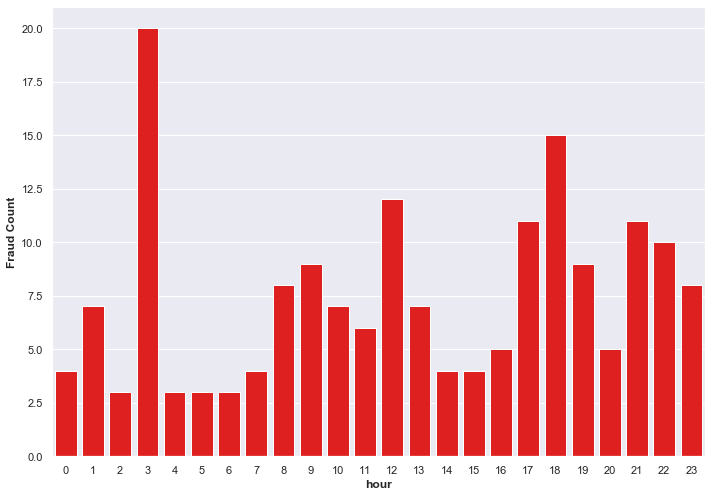

In [88]:
ax = sns.barplot(x= dataHours.hour, y=dataHours['fraud_count'], color='red')
plt.ylabel('Fraud Count',fontweight='bold',fontsize=12,rotation=90)
plt.xlabel('hour',fontweight='bold',fontsize=12,rotation=0)
## Sayı bul

Text(0.5, 0, 'hour')

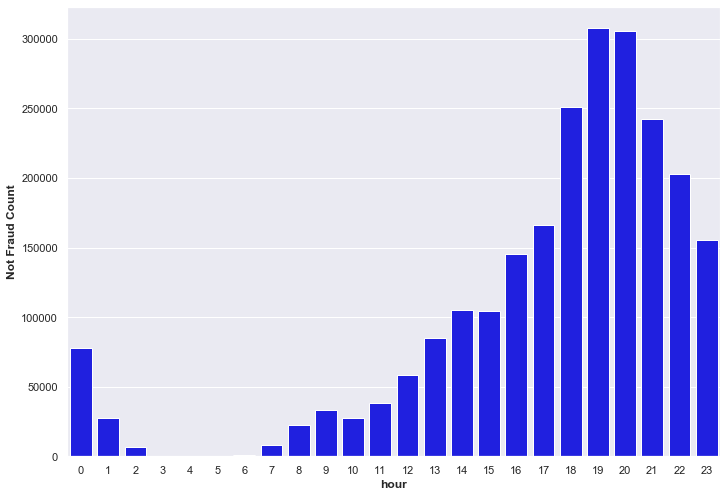

In [89]:
ax = sns.barplot(x= dataHours.hour, y=dataHours['not_fraud_count'], color='blue')
plt.ylabel('Not Fraud Count',fontweight='bold',fontsize=12,rotation=90)
plt.xlabel('hour',fontweight='bold',fontsize=12,rotation=0)

Text(0.5, 0, 'hour')

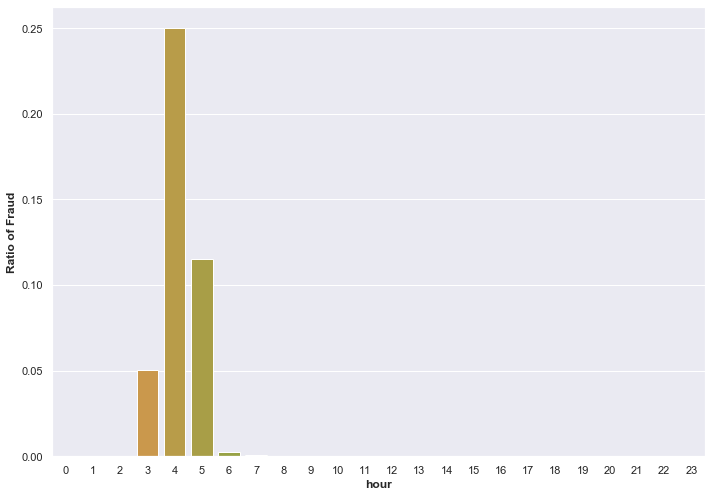

In [90]:

ax = sns.barplot(x= dataHours.hour, y=dataHours['fraud_prop'])
plt.ylabel('Ratio of Fraud',fontweight='bold',fontsize=12,rotation=90)
plt.xlabel('hour',fontweight='bold',fontsize=12,rotation=0)

In [91]:
## Create a New Column with Action

In [92]:
# create a list of our conditions
conditions = [
    (data['action'] == 'CASH_IN'),
    (data['action'] == 'CASH_OUT') ,
    (data['action'] == 'DEBIT'),
    (data['action'] == 'PAYMENT'),
    (data['action'] == 'TRANSFER')
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '0', '0','1']

# create a new column and use np.select to assign values to it using our lists as arguments
data['newAction'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0


In [ ]:
# Create a New Column with Action

In [93]:
data_11=data[data['oldBalanceOrig']==data['newBalanceOrig']]
data_11[data_11['isFraud']==0].head()


,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction
22,30,1,TRANSFER,262738.68,C9753408640,21.82,21.82,C9779107888,27.15,27.15,0,0,1,1
519,705,1,TRANSFER,107519.32,C1507337155,65.60,65.60,C7448466496,14.94,14.94,0,0,1,1
1172,1624,1,CASH_OUT,43739.06,C9138794945,-11395.28,-11395.28,C5810713478,0.00,0.00,0,0,1,1
1395,1947,1,DEBIT,14819.30,C4448860867,47.70,47.70,B9550196511,0.00,0.00,0,0,1,0
1396,1948,1,DEBIT,2861.72,C4448860867,47.70,47.70,B9550196511,0.00,0.00,0,0,1,0


In [94]:
data_11[data_11['isFraud']==1].head()
## As we can see no fraud data if data['oldBalanceOrig']==data['newBalanceOrig']

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction


In [95]:
data_11.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction
22,30,1,TRANSFER,262738.68,C9753408640,21.82,21.82,C9779107888,27.15,27.15,0,0,1,1
519,705,1,TRANSFER,107519.32,C1507337155,65.60,65.60,C7448466496,14.94,14.94,0,0,1,1
1172,1624,1,CASH_OUT,43739.06,C9138794945,-11395.28,-11395.28,C5810713478,0.00,0.00,0,0,1,1
1395,1947,1,DEBIT,14819.30,C4448860867,47.70,47.70,B9550196511,0.00,0.00,0,0,1,0
1396,1948,1,DEBIT,2861.72,C4448860867,47.70,47.70,B9550196511,0.00,0.00,0,0,1,0


In [96]:
## data['oldBalanceOrig']==data['newBalanceOrig'] olan datalar çıkarılabilir.

In [195]:
data_44 = data['oldBalanceOrig'] == data['newBalanceOrig']

In [196]:
data_44


0          False
1          False
2          False
3          False
4          False
           ...  
2372800    False
2372801    False
2372802    False
2372803    False
2372804    False
Length: 2372805, dtype: bool

In [ ]:
## Creating New Column 'isNewBalanceZero'

In [98]:
data_12=data[data['newBalanceOrig']==0]
data_12.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction
10396,14638,7,TRANSFER,80.62,C5003763255,80.62,0.0,C6576391538,0.00,80.62,0,0,7,1
10397,14639,7,CASH_OUT,80.62,C6576391538,80.62,0.0,C5959097984,0.00,0.00,0,0,7,1
286502,405196,19,TRANSFER,1224021.12,C7228362229,1224021.12,0.0,C7681658545,0.00,1224021.12,0,0,19,1
286503,405197,19,CASH_OUT,1224021.12,C7681658545,1224021.12,0.0,C2010779467,3861.37,3861.37,0,0,19,1
286504,405208,19,CASH_OUT,1299571.35,C0877015457,1299571.35,0.0,C7830760844,11725.66,11725.66,0,0,19,1


In [99]:
pd.crosstab(data['action'], data['isFraud'])

isFraud,0,1
action,,
CASH_IN,1032064,0
CASH_OUT,560058,94
DEBIT,88122,0
PAYMENT,553096,0
TRANSFER,139287,84


In [100]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0


In [101]:
data['isNewBalanceZero'] = np.where(data['newBalanceOrig']== 0, '1', '0')
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0


In [102]:
data_13=data[data['isNewBalanceZero']=='1']
data_13[data_13['isFraud']==0]

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero
10396,14638,7,TRANSFER,80.62,C5003763255,80.62,0.0,C6576391538,0.00,80.62,0,0,7,1,1
10397,14639,7,CASH_OUT,80.62,C6576391538,80.62,0.0,C5959097984,0.00,0.00,0,0,7,1,1
286502,405196,19,TRANSFER,1224021.12,C7228362229,1224021.12,0.0,C7681658545,0.00,1224021.12,0,0,19,1,1
286503,405197,19,CASH_OUT,1224021.12,C7681658545,1224021.12,0.0,C2010779467,3861.37,3861.37,0,0,19,1,1
286504,405208,19,CASH_OUT,1299571.35,C0877015457,1299571.35,0.0,C7830760844,11725.66,11725.66,0,0,19,1,1
317877,449628,20,TRANSFER,198426.94,C4668873712,198426.94,0.0,C3969785602,0.00,198426.94,0,0,20,1,1
394308,557557,27,CASH_OUT,1044682.16,C6945457832,1044682.16,0.0,C3090432872,6853.45,6853.45,0,0,3,1,1
638150,902293,46,TRANSFER,1881816.00,C4488423238,1881816.00,0.0,C8956229477,0.00,1881816.00,0,0,22,1,1
638151,902294,46,CASH_OUT,1881816.00,C8956229477,1881816.00,0.0,C7957830264,36600.35,36600.35,0,0,22,1,1
2337419,3302922,522,CASH_OUT,155059.44,C6849174513,0.00,0.0,C6470069153,154329.83,154329.83,0,0,18,1,1


In [103]:
data_13=data[data['isNewBalanceZero']=='0']
data_13[data_13['isFraud']==1]

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero
483689,683944,40,TRANSFER,2589453.21,C9136552933,3239211.96,649758.75,C9533916276,0.00,2589453.21,1,0,16,1,0
561113,793385,43,TRANSFER,215111.02,C0013238832,303714.45,88603.43,C2529805815,10.00,215121.02,1,0,19,1,0
658336,930994,49,TRANSFER,940220.55,C4866403523,940371.93,151.38,C6686026232,0.00,940220.55,1,0,1,1,0
658640,931406,52,TRANSFER,1316929.00,C6218421152,1894479.63,577550.63,C9836714209,52847.50,1369776.50,1,0,4,1,0
658649,931424,79,TRANSFER,2512759.02,C1404735682,3267085.91,754326.89,C7649417759,5001.89,2517760.91,1,0,7,1,0
658650,931425,79,TRANSFER,4230751.25,C6402505508,4283909.06,53157.81,C9748715493,785231.00,5015982.25,1,0,7,1,0
658651,931426,80,TRANSFER,1794313.02,C6119341891,2331905.60,537592.58,C1456451672,2481124.10,4275437.12,1,0,8,1,0
658654,931429,85,CASH_OUT,2229802.20,C3118459580,2304033.01,74230.81,C9148240261,26324.33,26324.33,1,0,13,1,0
658655,931430,87,CASH_OUT,1442233.77,C1456451672,4275437.12,2833203.35,C1588267071,41895.12,41895.12,1,0,15,1,0
658658,931434,90,CASH_OUT,2466184.24,C7649417759,2517760.91,51576.67,C1250832279,34822.32,34822.32,1,0,18,1,0


In [ ]:
## Create New Column with KNN

In [104]:
dataHours.head()

,hour,not_fraud_count,fraud_count,fraud_prop
0,0,77875,4,0.000051
1,1,27616,7,0.000253
2,2,6613,3,0.000454
3,3,395,20,0.050633
4,4,12,3,0.250000


In [105]:
from sklearn.cluster import KMeans

In [106]:
a = dataHours[['fraud_prop']]
## Başka değişken de eklemek lazım

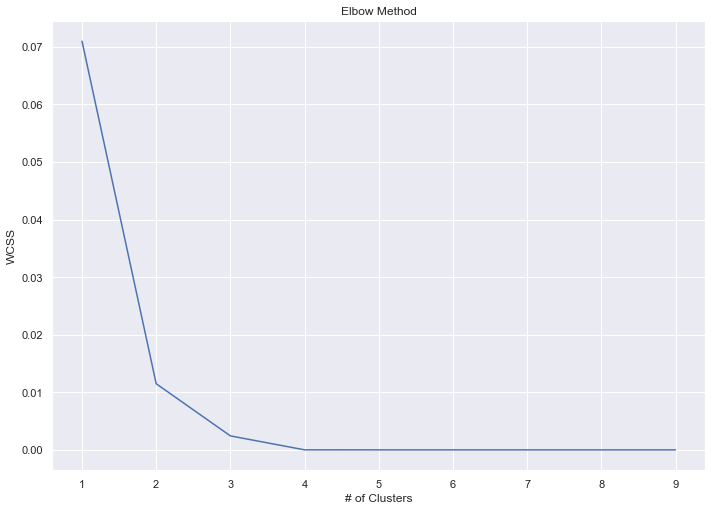

In [110]:
# Within-Cluster-Sum-of-Squares (WCSS)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

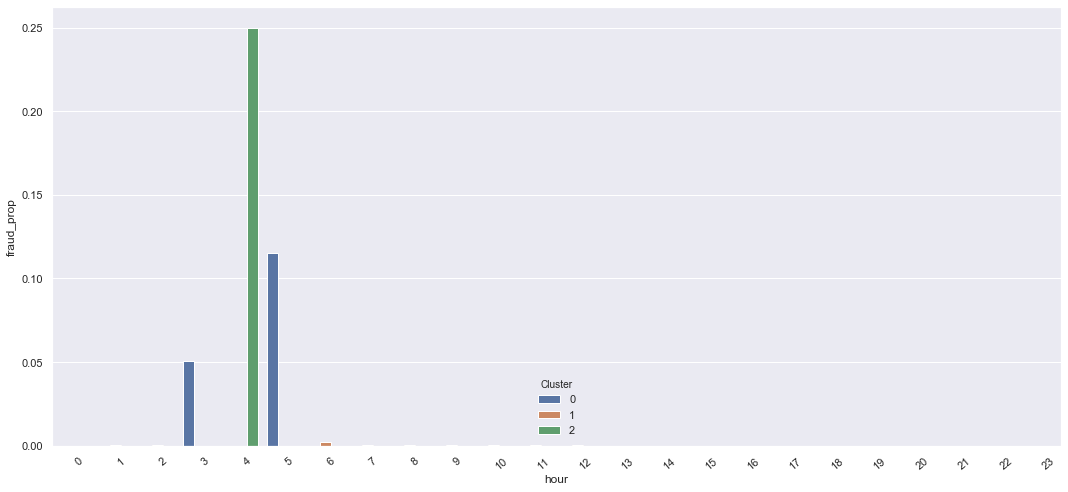

In [111]:
dataHours['Cluster'] = KMeans(n_clusters=3).fit(a).labels_

plt.figure(figsize=(15,7))
ax = sns.barplot(x= dataHours['hour'], y=dataHours['fraud_prop'], 
                 hue=dataHours['Cluster'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")
plt.tight_layout()
plt.show()

In [112]:
dataHours

,hour,not_fraud_count,fraud_count,fraud_prop,Cluster
0,0,77875,4,0.000051,1
1,1,27616,7,0.000253,1
2,2,6613,3,0.000454,1
3,3,395,20,0.050633,0
4,4,12,3,0.250000,2
5,5,26,3,0.115385,0
6,6,1285,3,0.002335,1
7,7,8371,4,0.000478,1
8,8,22299,8,0.000359,1
9,9,33133,9,0.000272,1


In [113]:
dataHours.head()

,hour,not_fraud_count,fraud_count,fraud_prop,Cluster
0,0,77875,4,0.000051,1
1,1,27616,7,0.000253,1
2,2,6613,3,0.000454,1
3,3,395,20,0.050633,0
4,4,12,3,0.250000,2


In [114]:
dataCluster=dataHours[['hour','Cluster']]
dataCluster=dataCluster.rename(columns={"Cluster":"hourCluster"})
dataCluster.head()

,hour,hourCluster
0,0,1
1,1,1
2,2,1
3,3,0
4,4,2


In [115]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0


In [116]:
dataClusterMerge = data.merge(dataCluster, on='hour', how='left')
dataClusterMerge.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1


In [117]:
data=dataClusterMerge

In [118]:
## Create New Column with Mean Amount for nameOrig

In [119]:
## Data2

In [120]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1


In [121]:
data2 = data
data2.head()


,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1


In [122]:
dataHourCountNotFraud = dataHourNotFraud.groupby(['hour'])['isFraud'].aggregate(['count'])
dataHourCountNotFraud
dataHourCountNotFraud=dataHourCountNotFraud.add_suffix('_Count').reset_index()
dataHourCountNotFraud = dataHourCountNotFraud.rename(columns={'count_Count': 'not_fraud_count'})
dataHourCountNotFraud=pd.DataFrame(dataHourCountNotFraud)
dataHourCountNotFraud

,hour,not_fraud_count
0,0,77875
1,1,27616
2,2,6613
3,3,395
4,4,12
5,5,26
6,6,1285
7,7,8371
8,8,22299
9,9,33133


In [123]:
data2CustomerMeanAmount = data2.groupby(['nameOrig'])['amount'].aggregate(['mean'])
data2CustomerMeanAmount= data2CustomerMeanAmount.add_suffix('_Count').reset_index()
data2CustomerMeanAmount = data2CustomerMeanAmount.rename(columns={'mean_Count': 'mean_amount'})
data2CustomerMeanAmount=pd.DataFrame(data2CustomerMeanAmount)

In [124]:
data2CustomerMeanAmount.head()

,nameOrig,mean_amount
0,C0000212644,191373.922397
1,C0002496944,120222.402564
2,C0003245113,115454.164330
3,C0005346458,233769.633289
4,C0006486567,145945.208378


In [125]:
data2 = data2.merge(data2CustomerMeanAmount, on='nameOrig', how='left')
data2.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,mean_amount
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1,194019.312308
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1,131507.338182
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1,148448.342371
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1,148448.342371
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1,148448.342371


In [126]:
data2['amountChange']=data2['amount']/data2['mean_amount']
data2.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,mean_amount,amountChange
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1,194019.312308,0.000052
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1,131507.338182,0.797866
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1,148448.342371,0.251826
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1,148448.342371,0.888582
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1,148448.342371,0.856228


In [127]:
data3 = data2.drop(columns=['mean_amount'])
data3.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,amountChange
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1,0.000052
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1,0.797866
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1,0.251826
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1,0.888582
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1,0.856228


In [128]:
data = data3

In [129]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,amountChange
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1,0.000052
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1,0.797866
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1,0.251826
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1,0.888582
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1,0.856228


In [130]:
data.shape

(2372805, 17)

In [131]:
data_20=data2[data2['oldBalanceOrig']!=data2['newBalanceOrig']]
data_20=data_20[data_20['amountChange']>20]
data_21=data_20[data_20['isFraud']==1]
data_21=data_21[data_21['isNewBalanceZero']=='0']
data_21

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,mean_amount,amountChange
658650,931425,79,TRANSFER,4230751.25,C6402505508,4283909.06,53157.81,C9748715493,785231.00,5015982.25,1,0,7,1,0,1,196751.315000,21.503039
695804,983956,99,TRANSFER,2607428.10,C7454504558,3496768.53,889340.43,C0547763860,151.38,2607579.48,1,0,3,1,0,0,128631.649919,20.270502
1894434,2677643,295,TRANSFER,3680844.15,C2438737160,4303767.82,622923.67,C7788528877,136315.25,3817159.40,1,0,7,1,0,1,159891.627229,23.020869
2346296,3315636,546,TRANSFER,5144492.24,C4070352788,6778503.24,1634011.00,C3846724470,300.00,5144792.24,1,0,18,1,0,1,184653.459697,27.860254


In [132]:
data_21.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,mean_amount,amountChange
658650,931425,79,TRANSFER,4230751.25,C6402505508,4283909.06,53157.81,C9748715493,785231.00,5015982.25,1,0,7,1,0,1,196751.315000,21.503039
695804,983956,99,TRANSFER,2607428.10,C7454504558,3496768.53,889340.43,C0547763860,151.38,2607579.48,1,0,3,1,0,0,128631.649919,20.270502
1894434,2677643,295,TRANSFER,3680844.15,C2438737160,4303767.82,622923.67,C7788528877,136315.25,3817159.40,1,0,7,1,0,1,159891.627229,23.020869
2346296,3315636,546,TRANSFER,5144492.24,C4070352788,6778503.24,1634011.00,C3846724470,300.00,5144792.24,1,0,18,1,0,1,184653.459697,27.860254


In [ ]:
## Data Export for R Shinny

In [ ]:
##dataR1=data.iloc[0:1048575,:]
##dataR1=pd.DataFrame(dataR1)
##dataR1.tail()
##dataR1.shape

In [ ]:
##dataR2=data.iloc[1048575:1999999,:]
##dataR2=pd.DataFrame(dataR2)
##dataR2.head()
##dataR2.shape

In [ ]:
##dataR3=data.iloc[1999999:,:]
##dataR3=pd.DataFrame(dataR3)
##dataR3.head()
##dataR3.shape

In [ ]:
##dataR2.tail()

In [ ]:
##dataR3.head()

In [ ]:
from pandas import ExcelWriter

##writer = ExcelWriter('dataR1.xlsx')
## dataR1.to_excel(writer,'Sheet1')
##writer.save()

In [ ]:
from pandas import ExcelWriter

##writer = ExcelWriter('dataR2.xlsx')
##dataR2.to_excel(writer,'Sheet1')
##writer.save()

In [ ]:
from pandas import ExcelWriter

##writer = ExcelWriter('dataR3.xlsx')
##dataR3.to_excel(writer,'Sheet1')
##writer.save()

In [133]:
dataR = data.groupby(['action','isNewBalanceZero', 'hour','isFraud'])['Id'].aggregate(['count'])
dataR

count
action   isNewBalanceZero hour isFraud       
CASH_IN  0                0    0        28463
                          1    0        11803
                          2    0         2791
                          3    0          149
                          4    0            1
...                                       ...
TRANSFER 1                20   1            2
                          21   1            5
                          22   0            1
                               1            3
                          23   1            4

[195 rows x 1 columns]

In [134]:
dataR= dataR.add_suffix('_Count').reset_index()
dataR = dataR.rename(columns={'mean_Count': 'mean_amount'})
dataR=pd.DataFrame(dataR)
dataR

,action,isNewBalanceZero,hour,isFraud,count_Count
0,CASH_IN,0,0,0,28463
1,CASH_IN,0,1,0,11803
2,CASH_IN,0,2,0,2791
3,CASH_IN,0,3,0,149
4,CASH_IN,0,4,0,1
...,...,...,...,...,...
190,TRANSFER,1,20,1,2
191,TRANSFER,1,21,1,5
192,TRANSFER,1,22,0,1
193,TRANSFER,1,22,1,3


In [ ]:
##writer = ExcelWriter('dataR.xlsx')
##dataR.to_excel(writer,'Sheet1')
##writer.save()

In [ ]:
## MODELLEME

In [135]:
data.head()

,Id,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,hour,newAction,isNewBalanceZero,hourCluster,amountChange
0,0,0,TRANSFER,10.00,C0198526315,30112.00,30102.00,C4653045645,21927.84,21937.84,0,0,0,1,0,1,0.000052
1,1,1,CASH_IN,104925.19,C9864462944,42.23,104967.41,C7853342674,0.00,0.00,0,0,1,0,0,1,0.797866
2,2,1,CASH_IN,37383.17,C1474610910,49.83,37433.01,C3584357969,0.00,0.00,0,0,1,0,0,1,0.251826
3,3,1,CASH_IN,131908.49,C1474610910,37433.01,169341.49,C4996589500,0.00,0.00,0,0,1,0,0,1,0.888582
4,4,1,CASH_IN,127105.65,C1474610910,169341.49,296447.14,C5989915138,0.00,0.00,0,0,1,0,0,1,0.856228


In [137]:
dfRaw=data
for i in dfRaw.columns:
    print(i)

Id
step
action
amount
nameOrig
oldBalanceOrig
newBalanceOrig
nameDest
oldBalanceDest
newBalanceDest
isFraud
isFlaggedFraud
hour
newAction
isNewBalanceZero
hourCluster
amountChange


In [138]:
dfRaw.dtypes

Id                    int64
step                  int64
action               object
amount              float64
nameOrig             object
oldBalanceOrig      float64
newBalanceOrig      float64
nameDest             object
oldBalanceDest      float64
newBalanceDest      float64
isFraud               int64
isFlaggedFraud        int64
hour                  int64
newAction            object
isNewBalanceZero     object
hourCluster           int32
amountChange        float64
dtype: object

In [139]:
df=dfRaw.iloc[:,1:]

In [165]:
df.dtypes

step                  int64
amount              float64
nameOrig             object
oldBalanceOrig      float64
newBalanceOrig      float64
nameDest             object
oldBalanceDest      float64
newBalanceDest      float64
isFraud               int64
hour                 object
newAction            object
isNewBalanceZero     object
hourCluster          object
amountChange        float64
dtype: object

In [142]:
df['hour']=df['hour'].astype(object)
df['hourCluster']=df['hourCluster'].astype(object)

In [143]:
df=df.drop(columns=['isFlaggedFraud'])

In [164]:
df=df.drop(columns=['action'])

In [197]:
df=df.drop(columns=['nameDest'])

In [198]:
df=df.drop(columns=['nameOrig'])

In [920]:
## Draft Model

In [921]:
## All variables are included

In [156]:
from sklearn.model_selection import train_test_split

In [199]:
X = df.drop('isFraud', axis=1)
y= df.isFraud

In [200]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.40, random_state=42)
## I have chosen test size as 0.40. Because number of fraud are very low. So increase to model performance accuracy ı selected as 0.40

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
DecisionTreeClassModel= DecisionTreeClassifier()

In [203]:
fitDT=DecisionTreeClassModel.fit(X_train, y_train)

In [205]:
y_pred = fitDT.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [214]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [213]:
cmDT = cm(y_test, y_pred)
print("Confisuon Matrix:\n", cmDT)

Confisuon Matrix:
 [[949049      6]
 [     9     58]]


In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    949055
           1       0.91      0.87      0.89        67

    accuracy                           1.00    949122
   macro avg       0.95      0.93      0.94    949122
weighted avg       1.00      1.00      1.00    949122



In [ ]:
## Grid search çalıştırmadı. Sanırım size büyük diye

In [227]:
features=X_train.columns.tolist()
features

['step',
 'amount',
 'oldBalanceOrig',
 'newBalanceOrig',
 'oldBalanceDest',
 'newBalanceDest',
 'hour',
 'newAction',
 'isNewBalanceZero',
 'hourCluster',
 'amountChange']

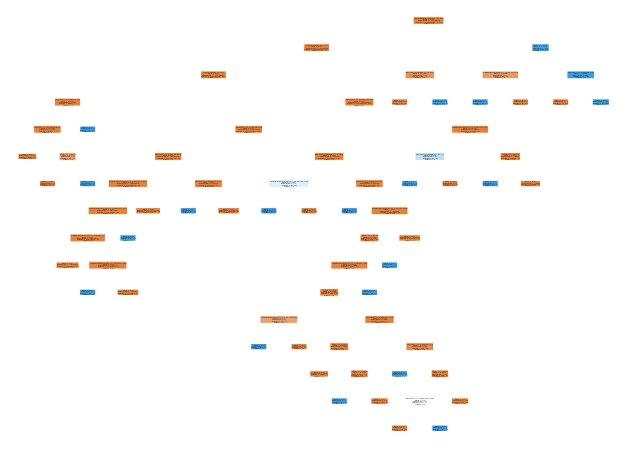

In [228]:
from sklearn import tree
tree.plot_tree(fitDT,feature_names=features,class_names=['0', '1'], rounded=True,filled=True,impurity=True );


In [ ]:
## Decision Tree with max_depth

In [219]:
DecisionTreeClassModel2= DecisionTreeClassifier(max_depth=3)

In [220]:
fitDT2=DecisionTreeClassModel2.fit(X_train, y_train)

In [221]:
y_pred = fitDT2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
cmDT2 = cm(y_test, y_pred)
print("Confisuon Matrix:\n", cmDT2)

Confisuon Matrix:
 [[949053      2]
 [    13     54]]


In [223]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    949055
           1       0.96      0.81      0.88        67

    accuracy                           1.00    949122
   macro avg       0.98      0.90      0.94    949122
weighted avg       1.00      1.00      1.00    949122



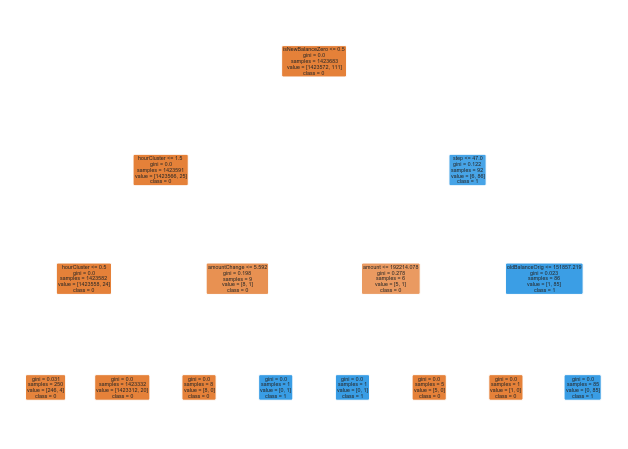

In [233]:
tree.plot_tree(fitDT2,feature_names=features,class_names=['0', '1'], rounded=True,filled=True,impurity=True );

In [234]:
fitDT.feature_importances_

array([0.07226964, 0.06890238, 0.00750809, 0.01621751, 0.02580372,
       0.03358088, 0.00163224, 0.        , 0.72422844, 0.00157628,
       0.04828082])

In [235]:
X_train.columns

Index(['step', 'amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest',
       'newBalanceDest', 'hour', 'newAction', 'isNewBalanceZero',
       'hourCluster', 'amountChange'],
      dtype='object')

In [ ]:
## Random Forest

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
randomForestModel=RandomForestClassifier(max_depth=5)

In [243]:
fitRF=randomForestModel.fit(X_train, y_train)

In [244]:
y_pred = fitRF.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [245]:
cmRF = cm(y_test, y_pred)
cmRF

array([[949054,      1],
       [    14,     53]], dtype=int64)

In [246]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    949055
           1       0.98      0.79      0.88        67

    accuracy                           1.00    949122
   macro avg       0.99      0.90      0.94    949122
weighted avg       1.00      1.00      1.00    949122



In [ ]:
## XGBoost

In [249]:
from xgboost import XGBClassifier

In [250]:
XGBoostModel=XGBClassifier()

In [ ]:
## learning_rate, max_depth
## class_weight = balance
## 

In [253]:
df.dtypes

step                  int64
amount              float64
oldBalanceOrig      float64
newBalanceOrig      float64
oldBalanceDest      float64
newBalanceDest      float64
isFraud               int64
hour                 object
newAction            object
isNewBalanceZero     object
hourCluster          object
amountChange        float64
dtype: object

In [254]:
X_train['hour']=X_train['hour'].astype(int)
X_train['newAction']=X_train['newAction'].astype(int)
X_train['isNewBalanceZero']=X_train['isNewBalanceZero'].astype(int)
X_train['hourCluster']=X_train['hourCluster'].astype(int)

C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [255]:
X_test['hour']=X_test['hour'].astype(int)
X_test['newAction']=X_test['newAction'].astype(int)
X_test['isNewBalanceZero']=X_test['isNewBalanceZero'].astype(int)
X_test['hourCluster']=X_test['hourCluster'].astype(int)

C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [256]:
X_test.dtypes

step                  int64
amount              float64
oldBalanceOrig      float64
newBalanceOrig      float64
oldBalanceDest      float64
newBalanceDest      float64
hour                  int32
newAction             int32
isNewBalanceZero      int32
hourCluster           int32
amountChange        float64
dtype: object

In [257]:
fitXGB=XGBoostModel.fit(X_train, y_train)

In [258]:
y_pred = fitXGB.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [259]:
cmXGB = cm(y_test, y_pred)
cmXGB 

array([[949053,      2],
       [     9,     58]], dtype=int64)

In [260]:
print("Confisuon Matrix:\n", cmXGB)

Confisuon Matrix:
 [[949053      2]
 [     9     58]]


In [261]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    949055
           1       0.97      0.87      0.91        67

    accuracy                           1.00    949122
   macro avg       0.98      0.93      0.96    949122
weighted avg       1.00      1.00      1.00    949122



In [ ]:
## Under Sampling - Imblanced Problem

In [266]:
df_0=df[df['isFraud']==0]
df_0.shape

(2372627, 12)

In [269]:
df_1=df[df['isFraud']==1]
df_1.shape

(178, 12)

In [268]:
df_sample=df_0.sample(frac=0.01)
df_sample.shape

(23726, 12)

In [273]:
df_balanced=pd.concat([df_1, df_sample])

In [271]:
## Modelleme - Balanced Data

In [272]:
## XG Boost

In [275]:
df_balanced.dtypes

step                  int64
amount              float64
oldBalanceOrig      float64
newBalanceOrig      float64
oldBalanceDest      float64
newBalanceDest      float64
isFraud               int64
hour                 object
newAction            object
isNewBalanceZero     object
hourCluster          object
amountChange        float64
dtype: object

In [279]:
X= df_balanced.drop('isFraud', axis=1)
y= df_balanced.isFraud

In [280]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.40, random_state=42)
## I have chosen test size as 0.40. Because number of fraud are very low. So increase to model performance accuracy ı selected as 0.40

In [281]:
X_train.shape

(14342, 11)

In [282]:
X_train['hour']=X_train['hour'].astype(int)
X_train['newAction']=X_train['newAction'].astype(int)
X_train['isNewBalanceZero']=X_train['isNewBalanceZero'].astype(int)
X_train['hourCluster']=X_train['hourCluster'].astype(int)

C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [283]:
X_test['hour']=X_test['hour'].astype(int)
X_test['newAction']=X_test['newAction'].astype(int)
X_test['isNewBalanceZero']=X_test['isNewBalanceZero'].astype(int)
X_test['hourCluster']=X_test['hourCluster'].astype(int)

C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ahmet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [284]:
X_train.dtypes

step                  int64
amount              float64
oldBalanceOrig      float64
newBalanceOrig      float64
oldBalanceDest      float64
newBalanceDest      float64
hour                  int32
newAction             int32
isNewBalanceZero      int32
hourCluster           int32
amountChange        float64
dtype: object

In [285]:
XGBoostModelBal=XGBClassifier()

In [286]:
fitXGBBal=XGBoostModelBal.fit(X_train, y_train)

In [287]:
y_pred = fitXGBBal.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [288]:
cmXGB = cm(y_test, y_pred)
print("Confisuon Matrix:\n", cmXGB) 

Confisuon Matrix:
 [[9491    2]
 [   6   63]]


In [289]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9493
           1       0.97      0.91      0.94        69

    accuracy                           1.00      9562
   macro avg       0.98      0.96      0.97      9562
weighted avg       1.00      1.00      1.00      9562



In [ ]:
## XGBoost with Parameters

In [ ]:
## Grid search yine olmuyor

In [309]:
XGBoostModelBalPar=XGBClassifier(max_depth=4, class_weight=0.2, learning_rate=0.1)

In [310]:
fitXGBBalPar=XGBoostModelBalPar.fit(X_train, y_train)

[01:14:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [311]:
y_pred = fitXGBBalPar.predict(X_test)

In [312]:
cmXGBPar = cm(y_test, y_pred)
print("Confisuon Matrix:\n", cmXGBPar)

Confisuon Matrix:
 [[9492    1]
 [   6   63]]


In [313]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9493
           1       0.98      0.91      0.95        69

    accuracy                           1.00      9562
   macro avg       0.99      0.96      0.97      9562
weighted avg       1.00      1.00      1.00      9562



In [314]:
fitXGBBalPar.feature_importances_

array([0.03215927, 0.02696398, 0.0145378 , 0.01092596, 0.06097738,
       0.00598631, 0.01247416, 0.0287531 , 0.75814426, 0.0289413 ,
       0.0201364 ], dtype=float32)

In [315]:
X_train.columns

Index(['step', 'amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest',
       'newBalanceDest', 'hour', 'newAction', 'isNewBalanceZero',
       'hourCluster', 'amountChange'],
      dtype='object')

In [318]:
featureImpXGBoost = pd.Series({'step': 0.03215927, 'amount': 0.02696398, 'oldBalanceOrig': 0.0145378 ,
                               'newBalanceOrig': 0.01092596, 'oldBalanceDest': 0.06097738, 'newBalanceDest': 0.00598631, 'hour': 0.01247416,
                             'newAction': 0.0287531 ,'isNewBalanceZero': 0.75814426,'hourCluster': 0.0289413 ,'amountChange': 0.0201364 })


In [320]:
dfFeatureImp=pd.DataFrame(featureImpXGBoost)
dfFeatureImp

,0
step,0.032159
amount,0.026964
oldBalanceOrig,0.014538
newBalanceOrig,0.010926
oldBalanceDest,0.060977
newBalanceDest,0.005986
hour,0.012474
newAction,0.028753
isNewBalanceZero,0.758144
hourCluster,0.028941


In [ ]:
## END